In [35]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.layers import  ZeroPadding2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [36]:
# Create list of all targets 
dataset_path = 'C:\\Users\\19080\\Downloads\\Compressed\\fyp_data'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]

print(all_targets)

['0_Scream', '1_Help_array', '2_other_classes']


In [39]:
# Settings
feature_sets_path = 'C:\\Users\\19080\\Downloads\\FYP_C_desk\\IFYP_WANG_ZILAI'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'fyp_keras.h5'


In [40]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [41]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [42]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1190, 16, 98)
(347, 16, 98)
(161, 16, 98)


In [43]:
# Peek at labels
print(y_val)

[1. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 2. 2. 0. 2. 2. 1. 2. 2. 2.
 2. 0. 0. 2. 2. 0. 2. 1. 2. 2. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 0. 2. 0. 2. 2. 2. 2. 2. 1. 2. 2. 0. 1.
 2. 0. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 1. 1. 1. 1. 0.
 2. 2. 2. 2. 2. 2. 1. 0. 2. 1. 1. 1. 0. 2. 0. 2. 1. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 0. 0. 2. 2. 2. 1. 2.
 2. 2. 2. 1. 0. 1. 2. 2. 2. 1. 0. 2. 2. 2. 1. 1. 0. 1. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 2. 2. 2. 0. 0. 1. 2. 2. 0. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 1.
 1. 1. 2. 2. 1. 2. 0. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 0. 2.
 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 2. 2. 0. 2. 0. 2. 2.
 2. 2. 0. 0. 2. 2. 1. 0. 2. 2. 0. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 0. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.

In [44]:
print(y_train)

[2. 1. 2. ... 2. 0. 1.]


In [47]:
# Peek at labels after conversion
print(y_val)

[1. 2. 2. 2. 1. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 2. 2. 0. 2. 2. 1. 2. 2. 2.
 2. 0. 0. 2. 2. 0. 2. 1. 2. 2. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2.
 0. 2. 2. 1. 2. 2. 2. 2. 2. 1. 2. 0. 2. 0. 2. 2. 2. 2. 2. 1. 2. 2. 0. 1.
 2. 0. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 1. 1. 1. 1. 0.
 2. 2. 2. 2. 2. 2. 1. 0. 2. 1. 1. 1. 0. 2. 0. 2. 1. 2. 1. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 0. 0. 2. 2. 2. 1. 2.
 2. 2. 2. 1. 0. 1. 2. 2. 2. 1. 0. 2. 2. 2. 1. 1. 0. 1. 1. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 2. 2. 2. 0. 0. 1. 2. 2. 0. 2. 2. 2. 0. 2. 2. 1. 2. 2. 2. 1.
 1. 1. 2. 2. 1. 2. 0. 2. 2. 0. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 0. 2.
 0. 2. 2. 0. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 1. 1. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 0. 2. 2. 0. 2. 0. 2. 2.
 2. 2. 0. 0. 2. 2. 1. 0. 2. 2. 0. 2. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1.
 2. 0. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2.

In [48]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

1.5504322766570606
-0.5504322766570606


In [49]:
# View the dimensions of our input data
print(x_train.shape)

(1190, 16, 98)


In [50]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1190, 16, 98, 1)
(347, 16, 98, 1)
(161, 16, 98, 1)


In [51]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 98, 1)


In [52]:
num_classes = 3

In [63]:


# size of input is 16*98
model = models.Sequential()
model.add(ZeroPadding2D(padding=(2, 2), input_shape=sample_shape))
model.add(layers.Conv2D(32, 
                        (5, 5), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(GlobalAveragePooling2D()) # statistical pooling
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))


In [64]:
# Display model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 20, 102, 1)       0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 98, 32)        832       
                                                                 
 batch_normalization_6 (Batc  (None, 16, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 49, 32)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 47, 32)         9248      
                                                      

In [65]:
# # Add training parameters to model
# model.compile(loss='binary_crossentropy', 
#               optimizer='rmsprop', 
#               metrics=['acc'])

In [66]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [67]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=16, # batch size
                    validation_data=(x_val, y_val))

Epoch 1/30
75/75 [==============================] - 2s 14ms/step - loss: 0.5371 - acc: 0.7941 - val_loss: 0.8434 - val_acc: 0.6830
Epoch 2/30
75/75 [==============================] - 1s 13ms/step - loss: 0.2303 - acc: 0.9143 - val_loss: 0.9546 - val_acc: 0.6916
Epoch 3/30
75/75 [==============================] - 1s 13ms/step - loss: 0.1653 - acc: 0.9412 - val_loss: 0.5636 - val_acc: 0.7147
Epoch 4/30
75/75 [==============================] - 1s 13ms/step - loss: 0.1266 - acc: 0.9639 - val_loss: 0.0862 - val_acc: 0.9683
Epoch 5/30
75/75 [==============================] - 1s 14ms/step - loss: 0.1276 - acc: 0.9588 - val_loss: 0.4020 - val_acc: 0.9049
Epoch 6/30
75/75 [==============================] - 1s 14ms/step - loss: 0.1054 - acc: 0.9681 - val_loss: 0.3348 - val_acc: 0.8646
Epoch 7/30
75/75 [==============================] - 1s 14ms/step - loss: 0.0865 - acc: 0.9639 - val_loss: 0.1255 - val_acc: 0.9568
Epoch 8/30
75/75 [==============================] - 1s 14ms/step - loss: 0.0762 - a

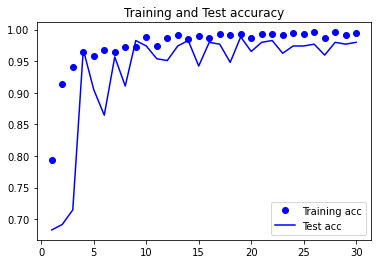

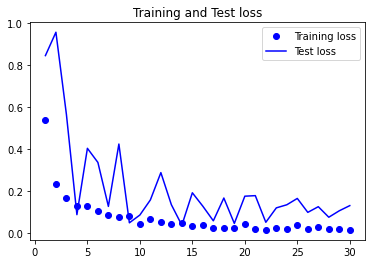

In [68]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Test acc')
plt.title('Training and Test accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Test loss')
plt.title('Training and Test loss')
plt.legend()

plt.show()

In [59]:
# Save the model as a file
models.save_model(model, model_filename)

In [60]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

1
4
6
15
17
22
29
33
47
55
56
57
63
65
69
70
79
81
83
84
85
86
87
91
109
121
132
135
137
140
141
153
155


In [61]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
#for i in range(100, 110):
for i in range(0, 100):
    print('Answer:', y_train[i], ' Prediction:', model.predict(np.expand_dims(x_train[i], 0)))

1/1 [==============================] - 0s 68ms/step
Answer: 2.0  Prediction: [[4.62381536e-07 1.00875015e-08 9.99999523e-01]]
1/1 [==============================] - 0s 14ms/step
Answer: 1.0  Prediction: [[4.5909044e-05 9.8656440e-01 1.3389721e-02]]
1/1 [==============================] - 0s 13ms/step
Answer: 2.0  Prediction: [[1.6162656e-14 1.2184068e-15 1.0000000e+00]]
1/1 [==============================] - 0s 15ms/step
Answer: 0.0  Prediction: [[9.9992394e-01 2.2887779e-12 7.6022181e-05]]
1/1 [==============================] - 0s 15ms/step
Answer: 2.0  Prediction: [[9.025998e-08 4.580039e-11 9.999999e-01]]
1/1 [==============================] - 0s 14ms/step
Answer: 2.0  Prediction: [[1.0555018e-11 3.8103438e-14 1.0000000e+00]]
1/1 [==============================] - 0s 15ms/step
Answer: 2.0  Prediction: [[2.090876e-15 9.640715e-22 1.000000e+00]]
1/1 [==============================] - 0s 15ms/step
Answer: 2.0  Prediction: [[8.160296e-09 9.798777e-14 1.000000e+00]]
1/1 [=================

1/1 [==============================] - 0s 15ms/step
Answer: 2.0  Prediction: [[2.1143402e-08 5.9451644e-10 1.0000000e+00]]
1/1 [==============================] - 0s 14ms/step
Answer: 2.0  Prediction: [[4.0538090e-10 4.0408625e-14 1.0000000e+00]]
1/1 [==============================] - 0s 14ms/step
Answer: 2.0  Prediction: [[3.9375128e-13 1.3278545e-17 1.0000000e+00]]
1/1 [==============================] - 0s 18ms/step
Answer: 0.0  Prediction: [[9.9999142e-01 7.5232355e-16 8.6249493e-06]]
1/1 [==============================] - 0s 16ms/step
Answer: 2.0  Prediction: [[1.0412562e-08 2.4674589e-11 1.0000000e+00]]
1/1 [==============================] - 0s 15ms/step
Answer: 1.0  Prediction: [[2.2066413e-11 1.0000000e+00 1.8277824e-08]]
1/1 [==============================] - 0s 14ms/step
Answer: 0.0  Prediction: [[9.3716961e-01 3.3925327e-09 6.2830381e-02]]
1/1 [==============================] - 0s 14ms/step
Answer: 1.0  Prediction: [[4.2769704e-10 9.9999535e-01 4.6905789e-06]]
1/1 [===========

In [62]:
# Valdation: calculate the True Positve & Negative  
model = models.load_model(model_filename)
#for i in range(100, 110):
len_0 = 0
len_1 = 0
len_2 = 0
len_3 = 0

len_00 = 0
len_11 = 0
len_22 = 0


len_000 = 0
len_111 = 0
len_222 = 0
for i in range(0, 200):
    output_data = model.predict(np.expand_dims(x_test[i], 0))
    top_index = float(np.argmax(output_data))
    if(y_test[i].item()==0.0):
        len_0 = len_0+1
    elif(y_test[i].item()==1.0):
        len_1 = len_1+1
    elif(y_test[i].item()==2.0):
        len_2 = len_2+1
    else:
        len_3 = len_3+1
    #print(top_index)
    #print(y_val[i].item())
    if((top_index != y_test[i].item())):
        print("not match, top index is: ",top_index," and label is: ", y_test[i])
        if(top_index ==0.0):
            len_00 = len_00+1
        elif(top_index ==1.0):
            len_11 = len_11+1
        elif(top_index ==2.0):
            len_22 = len_22+1
        if(y_test[i].item() ==0.0):
            len_000 = len_000+1
        elif(y_test[i].item() ==1.0):
            len_111 = len_111+1
        elif(y_test[i].item() ==2.0):
            len_222 = len_222+1

print(len_0)
print(len_1)
print(len_2)
print(len_3)
print(len_00)
print(len_11)
print(len_22)
print(len_000)
print(len_111)
print(len_222)
       

1/1 [==============================] - 0s 15ms/step
not match, top index is:  0.0  and label is:  2.0
1/1 [==============================] - 0s 16ms/step
not match, top index is:  2.0  and label is:  0.0
1/1 [==============================] - 0s 14ms/step
not match, top index is:  2.0  and label is:  0.0
1/1 [==============================] - 0s 13ms/step
not match, top index is:  2.0  and label is:  0.0
1/1 [==============================] - 0s 13ms/step
not match, top index is:  2.0  and label is:  0.0
1/1 [==============================] - 0s 14ms/step
not match, top index is:  0.0  and label is:  2.0
1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


IndexError: index 161 is out of bounds for axis 0 with size 161

In [ ]:
model.evaluate(x=x_val, y=y_val)

In [ ]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)